# HW 01 - PreProcessing and Analysis
## Stephen Blackwell
### 2/13/20

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Parts 1 - 5

In [2]:
bank = pd.read_csv('bank_data.csv', sep=',')
bank.head(10)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
5,ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
6,ID12107,22,8877.07,0,MALE,RURAL,NO,NO,NO,YES,NO,YES
7,ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,YES,NO,NO
8,ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO
9,ID12110,54,24212.10,2,MALE,TOWN,YES,YES,YES,YES,NO,NO


## Part 6

In [3]:
bank[['age', 'income', 'children']].describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [4]:
cWithCar = bank[['id', 'car']][bank['car'] == 'YES']
print("CUSTOMERS WITH CARS: " + str(len(cWithCar.index)))

CUSTOMERS WITH CARS: 296


In [5]:
rural = bank[bank['region'] == 'RURAL']
city = bank[bank['region'] =='INNER_CITY']
town = bank[bank['region'] == 'TOWN']
suburban = bank[bank['region'] == 'SUBURBAN']

print("RURAL KIDS PER PERSON: " + str(rural['children'].mean()))
print("INNER CITY KIDS PER PERSON: " + str(city['children'].mean()))
print("TOWN KIDS PER PERSON: " + str(town['children'].mean()))
print("SUBURBAN KIDS PER HOUSEHOD: " + str(suburban['children'].mean()))

RURAL KIDS PER PERSON: 1.2291666666666667
INNER CITY KIDS PER PERSON: 0.9516728624535316
TOWN KIDS PER PERSON: 1.0
SUBURBAN KIDS PER HOUSEHOD: 0.967741935483871


In [6]:
print("RURAL AGE STDDEV: " + str(rural['age'].std()))
print("INNER AGE STDDEV: " + str(city['age'].std()))
print("TOWN AGE STDDEV: " + str(town['age'].std()))
print("SUBURBAN AGE STDDEV: " + str(suburban['age'].std()))

RURAL AGE STDDEV: 14.396267638864753
INNER AGE STDDEV: 14.987306212272308
TOWN AGE STDDEV: 13.299309099720555
SUBURBAN AGE STDDEV: 15.222038978088628


Suburban people have the highest standard deviation of age which means they have the broadest spanning age range of the possible categories

In [7]:
saving = bank[bank['savings_acct'] == 'YES']
nSaving = bank[bank['savings_acct'] == 'NO']
print("INCOME WITH SAVINGS: " + str(saving['income'].mean()))
print("INCOME W/O SAVINGS: " + str(nSaving['income'].mean()))
print("DIFFERENCE IN INCOME: " + str(saving['income'].mean() - nSaving['income'].mean()))

INCOME WITH SAVINGS: 29823.43690821256
INCOME W/O SAVINGS: 22405.999193548385
DIFFERENCE IN INCOME: 7417.437714664175


In [8]:
pep = bank[bank['pep'] == 'YES']
nPep = bank[bank['pep'] == 'NO']
pepD = pep.describe()
nPepD = nPep.describe()

print("PEOPLE WITH PEP: ")
display(pepD)
print("PEOPLE W/O PEP: ")
display(nPepD)

PEOPLE WITH PEP: 


,age,income,children
count,274.000000,274.000000,274.000000
mean,45.127737,30644.919453,0.945255
std,14.327991,13609.613043,0.860571
min,18.000000,7756.360000,0.000000
25%,34.000000,19639.475000,0.000000
50%,45.000000,28080.050000,1.000000
75%,58.000000,38458.350000,1.000000
max,67.000000,63130.100000,3.000000


PEOPLE W/O PEP: 


,age,income,children
count,326.000000,326.000000,326.000000
mean,40.098160,24900.953374,1.067485
std,14.123506,11661.123422,1.195524
min,18.000000,5014.210000,0.000000
25%,27.000000,15366.475000,0.000000
50%,40.000000,23105.000000,0.000000
75%,51.000000,31210.900000,2.000000
max,67.000000,61554.600000,3.000000


## Part 7

In [9]:
bank['zScoreIncome'] = (bank['income'] - bank['income'].mean())/bank['income'].std()
incStd = bank['income'][(bank['zScoreIncome'] < 2) & (bank['zScoreIncome'] > -2)].describe()
inc = bank['income'].describe()

print("Standardized Income: ")
display(incStd)
print("Unstandardized Income: ")
display(inc)

Standardized Income: 


count      574.000000
mean     26158.553885
std      11429.150837
min       5014.210000
25%      17017.850000
50%      24475.800000
75%      33986.975000
max      53104.300000
Name: income, dtype: float64

Unstandardized Income: 


count      600.000000
mean     27524.031217
std      12899.468246
min       5014.210000
25%      17264.500000
50%      24925.300000
75%      36172.675000
max      63130.100000
Name: income, dtype: float64

The mean is lower for the standardized income because extraneously large incomes have not been included in the caluclation
The standard deviation is lower for the standardized values because, with the extraneous values removed, the data is naturally more clustered together, resulting in a lower std dev

## Problem 8

In [10]:
bank['age_bins'] = pd.qcut(bank['age'], [0, .33, .66, 1], labels=["young", "mid-age", "old"])
bank['age_bins'].value_counts()

young      209
old        198
mid-age    193
Name: age_bins, dtype: int64

## Problem 9

In [11]:
bank_norm = bank.copy()
bank_norm

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,zScoreIncome,age_bins
0,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523,mid-age
1,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541,mid-age
2,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766,old
3,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180,young
4,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,47025.00,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO,1.511765,old
596,ID12697,30,9672.25,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-1.383916,young
597,ID12698,31,15976.30,0,FEMALE,TOWN,YES,YES,YES,NO,NO,YES,-0.895210,young
598,ID12699,29,14711.80,0,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO,-0.993237,young


In [12]:
bank_norm['age'] = (bank['age'] - bank['age'].min()) / (bank['age'].max()-bank['age'].min())
bank_norm['income'] = (bank['income'] - bank['income'].min()) / (bank['income'].max()-bank['income'].min())
bank_norm['children'] = (bank['children'] - bank['children'].min()) / (bank['children'].max()-bank['children'].min())
bank_norm.dtypes

id                object
age              float64
income           float64
children         float64
gender            object
region            object
married           object
car               object
savings_acct      object
current_acct      object
mortgage          object
pep               object
zScoreIncome     float64
age_bins        category
dtype: object

### not sure about this answer
the mean and standard deviation for the normalized data set are all less than one, because all variables now exist with only values in between 0 and 1. 

## Problem 10

In [13]:
bank_norm.drop('id', axis=1, inplace=True)
bank_norm

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,zScoreIncome,age_bins
0,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523,mid-age
1,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541,mid-age
2,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766,old
3,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180,young
4,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.877551,0.722880,0.666667,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO,1.511765,old
596,0.244898,0.080151,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-1.383916,young
597,0.265306,0.188625,0.000000,FEMALE,TOWN,YES,YES,YES,NO,NO,YES,-0.895210,young
598,0.224490,0.166866,0.000000,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO,-0.993237,young


In [14]:
bank_norm[['has_car','no_car']] = pd.get_dummies(bank_norm['car'])
bank_norm[['inner_city','rural', 'suburban', 'town']] = pd.get_dummies(bank_norm['region'])
bank_norm[['not_married','is_married']] = pd.get_dummies(bank_norm['married'])
bank_norm[['no_savings_acct','has_savings_acct']] = pd.get_dummies(bank_norm['savings_acct'])
bank_norm[['no_current_acct','has_current_acct']] = pd.get_dummies(bank_norm['current_acct'])
bank_norm[['no_mortgage','has_mortgage']] = pd.get_dummies(bank_norm['mortgage'])
bank_norm[['no_pep','has_pep']] = pd.get_dummies(bank_norm['pep'])
bank_norm[['is_female','is_male']] = pd.get_dummies(bank_norm['gender'])


bank_norm

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,...,no_savings_acct,has_savings_acct,no_current_acct,has_current_acct,no_mortgage,has_mortgage,no_pep,has_pep,is_female,is_male
0,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,...,1,0,1,0,1,0,0,1,1,0
1,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,...,1,0,0,1,0,1,1,0,0,1
2,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,...,0,1,0,1,1,0,1,0,1,0
3,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,...,1,0,0,1,1,0,1,0,1,0
4,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,...,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.877551,0.722880,0.666667,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,...,0,1,0,1,0,1,1,0,1,0
596,0.244898,0.080151,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,...,0,1,0,1,1,0,1,0,1,0
597,0.265306,0.188625,0.000000,FEMALE,TOWN,YES,YES,YES,NO,NO,...,0,1,1,0,1,0,0,1,1,0
598,0.224490,0.166866,0.000000,MALE,INNER_CITY,YES,NO,YES,NO,YES,...,0,1,1,0,0,1,1,0,0,1


In [15]:
bank_norm.to_csv("bank_numeric.csv", float_format="%1.2f")

## Problem 11

In [16]:
bank_corr = bank_norm[['age', 'income', 'children', 'is_male', 'inner_city','rural', 'suburban', 'town', 'is_married', 'has_car', 'has_savings_acct', 'has_current_acct', 'has_mortgage', 'has_pep']].corr()
bank_corr

,age,income,children,is_male,inner_city,rural,suburban,town,is_married,has_car,has_savings_acct,has_current_acct,has_mortgage,has_pep
age,1.000000,0.752726,0.023572,-0.090081,-0.025171,0.018635,0.031345,-0.008510,0.010394,-0.077733,0.184389,-0.035312,-0.016154,0.173825
income,0.752726,1.000000,0.036761,-0.023845,-0.047564,0.084776,0.029824,-0.036431,-0.008386,-0.081556,0.266164,0.031616,-0.014662,0.221991
children,0.023572,0.036761,1.000000,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,-0.048716,-0.036455,0.041536,0.006238,-0.074339,-0.057663
is_male,-0.090081,-0.023845,-0.014206,1.000000,0.023459,0.009092,0.010951,-0.040472,0.021110,-0.006667,0.007207,-0.019466,0.066465,0.046843
inner_city,-0.025171,-0.047564,-0.051222,0.023459,1.000000,-0.393444,-0.306032,-0.573814,0.003254,0.018143,-0.091373,0.007894,0.002098,0.001054
rural,0.018635,0.084776,0.089902,0.009092,-0.393444,1.000000,-0.148158,-0.277798,-0.022649,-0.024006,0.036960,-0.008496,-0.051908,0.019714
suburban,0.031345,0.029824,-0.014122,0.010951,-0.306032,-0.148158,1.000000,-0.216080,0.012483,0.061184,0.002605,0.038157,0.004635,0.062508
town,-0.008510,-0.036431,-0.007033,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,0.006369,-0.041604,0.068654,-0.027431,0.036591,-0.059115
is_married,0.010394,-0.008386,-0.048716,0.021110,0.003254,-0.022649,0.012483,0.006369,1.000000,0.009571,0.028604,-0.059996,-0.021711,-0.189578
has_car,-0.077733,-0.081556,-0.036455,-0.006667,0.018143,-0.024006,0.061184,-0.041604,0.009571,1.000000,-0.034310,0.034783,0.007743,-0.018917


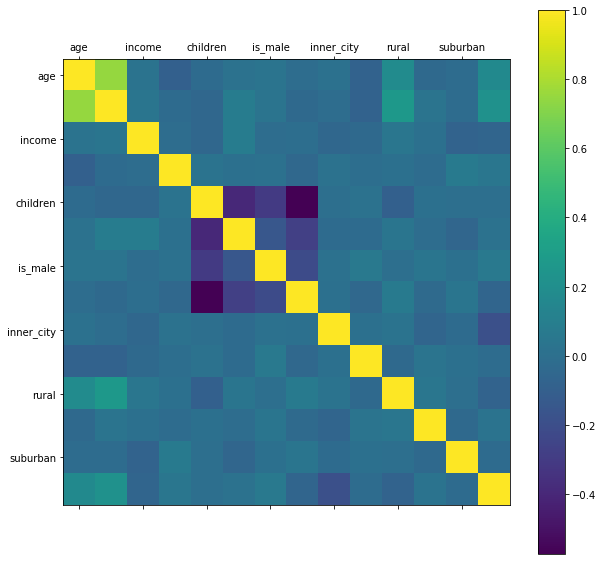

In [17]:
labels = ['age', 'income', 'children', 'is_male', 'inner_city','rural', 'suburban', 'town', 'is_married', 'has_car', 'has_savings_acct', 'has_current_acct', 'has_mortgage', 'has_pep']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(bank_corr)
fig.colorbar(cax)



ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)

plt.show()

We can see from our data that there is a correlation between living in a rural area and having a higher age. The same is true with suburban residents. This means these two areas are more likely to have a higher population of older people. 
We also see strong negative correlations between being a man and having a child. There is no mathematical reason for this to be true. Every child born increases the amount of children women have by one, and the amount of children men have by one. There are children of same sex couples, but those aren't a high enough percentage to skew the results this drastically. Maybe this correlation is because men are less likely to claim their children, as basically all mothers have medical records of their parenthood.

## Problem 12

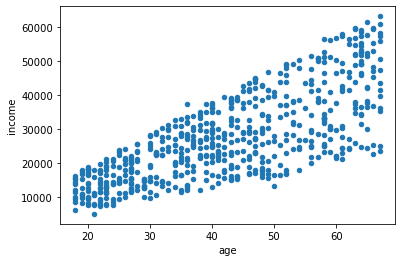

In [18]:
bank.plot(kind="scatter", x = 'age', y = 'income')

There is a strong correlation between age and income in this data set. We can see that as age increases the highest paid people earn steadily more and the lowest paid people also trend upwards in pay

## Problem 13

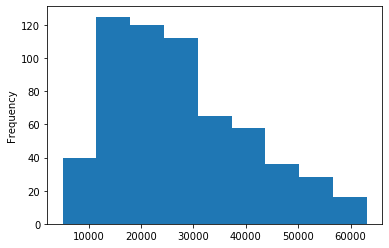

In [19]:
bank['income'].plot(kind='hist', bins = 9)

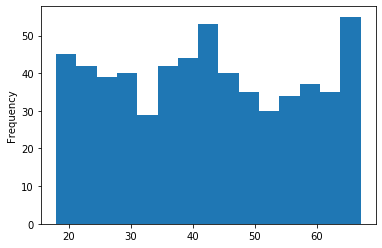

In [20]:
fig2 = bank['age'].plot(kind='hist', bins = 15)

## Problem 14

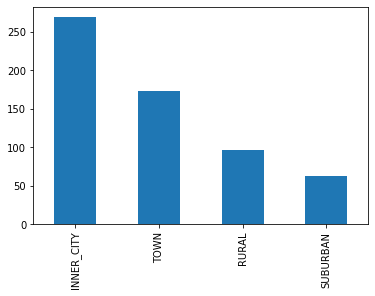

In [21]:
bank["region"].value_counts().plot(kind='bar')

## Problem 15

In [27]:
print("Region / has_pep / no_pep")
crosstab = pd.crosstab(bank_norm['region'], [bank_norm['has_pep']])
crosstab

Region / has_pep / no_pep


has_pep,0,1
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


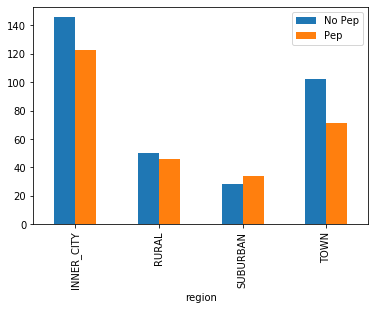

In [23]:
ax = crosstab.plot(kind="bar")
ax.legend(["No Pep", "Pep"])

## Problem 16

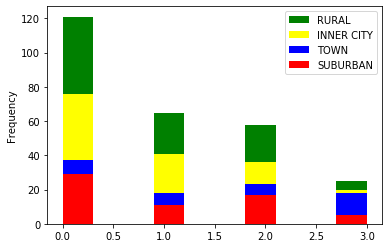

In [81]:

ax0 = bank[livingStatus.str.contains('INNER_CITY')]['children'].plot(kind="hist", alpha = 1, color='green')
ax1 = bank[livingStatus.str.contains('TOWN')]['children'].plot(kind="hist", alpha = 1, color='yellow', ax = ax0)
ax2 = bank[livingStatus.str.contains('RURAL')]['children'].plot(kind="hist", alpha = 1, color='blue', ax = ax0)

ax3 = bank[livingStatus.str.contains('SUBURBAN')]['children'].plot(kind="hist", alpha = 1, color='red', ax = ax0)
ax0.legend(["RURAL", "INNER CITY", "TOWN", "SUBURBAN"]);


We can see from this visualization that the amount of children had is most frequent at 0, and the frequency of people having incrementally higher kids decreases for rural and inner city people.
However, while town and suburnan both also have the most frequent occurence of 0 children, 